# Botendo-Gruppe

* [Funde](#Funde)
    * [Befunde](#Befunde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale (fabrics)](#Technologische-Merkmale-(fabrics))
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)
    * [Matrix mit allen Pos & Verz](#Matrix-mit-allen-Pos-&-Verz)
* [Verbreitung](#Verbreitung)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'BOT'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Funde

In [59]:
sql = """SELECT
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Ort.ort_fluss,
           t_Komplex.bef_nr,
           t_Komplex.bef_art,
           t_Obj.objID,
           t_Obj.Scherbe,
           t_Obj.Anzahl,
           t_Obj.Form_Gef,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [60]:
a = pd.Series({'GE':np.sum(df['Anzahl'].loc[df['Anzahl'] == 1]),
               'Ausgezählt':np.sum(df['Anzahl'].loc[df['Anzahl'] != 1])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Ausgezählt,120.0,37.735849
GE,198.0,62.264151


In [64]:
# nur einzeln aufgenommene GE
df_ge = df.loc[df['Anzahl'] == 1]

df_pivot = df_ge.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


Anzahl    Prozent
ort_fluss     Ort                 bef_nr                   
Likwala-Esobe Boleko (Fpl. 285)   87/101    24.0  12.121212
Sangha        Bobusa (Fpl. 239)   87/102    21.0  10.606061
              Sosolo (Fpl. 241)   87/101    19.0   9.595960
Zaire/Kongo   Gombe (Fpl. 237)    87/101    18.0   9.090909
Ubangi        Bobangi (Fpl. 189)  85/101    17.0   8.585859
              Boyoka (Fpl. 196)   85/101    12.0   6.060606
Likwala-Esobe Yumba (Fpl. 289)    87/103     8.0   4.040404
Ubangi        Bolumbu (Fpl. 194)  85/101     8.0   4.040404
              Ilanga (Fpl. 192)   85/101     8.0   4.040404
Likwala-Esobe Yumba (Fpl. 289)    87/101     6.0   3.030303
Ubangi        Loka (Fpl. 193)     85/101     6.0   3.030303
Likwala-Esobe Botwale (Fpl. 286)  87/101     6.0   3.030303
              Misongo (Fpl. 288)  87/101     5.0   2.525253
              Boyenge (Fpl. 284)  87/101     4.0   2.020202
Sangha        Bonga (Fpl. 238)    87/102     4.0   2.020202
Likwala-Esobe Boleko (Fpl. 285)   87/1       4.0   2.020202
              Yumba (Fpl. 289)    87/102     4.0   2.020202
              Bojenjo (Fpl. 292)  87/101     3.0   1.515152
Ubangi        Zamba (Fpl. 191)    85/101     3.0   1.515152
Likwala-Esobe Ngombe (Fpl. 283)   87/101     3.0   1.515152
Sangha        Bobusa (Fpl. 239)   87/2       3.0   1.515152
Zaire/Kongo   Lukolela (Fpl. 234) 87/101     2.0   1.010101
Sangha        Loboko (Fpl. 248)   87/101     2.0   1.010101
Ubangi        Bokwango (Fpl. 190) 85/101     2.0   1.010101
Zaire/Kongo   Sungu (Fpl. 236)    87/101     2.0   1.010101
Ubangi        Bobulu (Fpl. 198)   85/101     1.0   0.505051
Sangha        Pikunda (Fpl. 255)  87/101     1.0   0.505051
              Mitula (Fpl. 251)   87/102     1.0   0.505051
              Bonga (Fpl. 238)    87/101     1.0   0.505051

In [70]:
df_ge.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['Typ'], aggfunc = np.sum)

,Anzahl
Typ,
BBS/BOT (?),1.0
BOT,76.0
BOT (?),101.0
BOT/BDG (?),1.0
BOT/EBA (?),5.0
BOT/MKA (?),2.0
BOT/MKA/MAT (?),2.0
EBA/BOT,1.0
EBA/BOT (?),5.0


In [65]:
a = pd.Series({'sicher':np.sum(df_ge['Anzahl'].loc[df_ge['Typ'] == style]),
               'fraglich':np.sum(df_ge['Anzahl'].loc[df_ge['Typ'].str.contains(' ')])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,121.0,61.42132
sicher,76.0,38.57868


In [66]:
# nur ausgezählte Stücke
df_a = df.loc[df['Anzahl'] != 1]

In [7]:
df_a.pivot_table(values = 'Anzahl', index = 'Typ', columns = 'Scherbe', aggfunc = np.sum, margins = True)

Scherbe,G,R,W,All
Typ,,,,
BDG/BOT (?),NaN,NaN,2.0,2.0
BOT,NaN,19.0,7.0,26.0
BOT (?),NaN,30.0,42.0,72.0
EBA/BOT (?),NaN,NaN,11.0,11.0
EPE/BOT (?),NaN,9.0,NaN,9.0
All,NaN,58.0,62.0,120.0


In [8]:
df_pivot = df_a.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum, fill_value = '')
df_pivot

Anzahl
ort_fluss     Ort                bef_nr       
Likwala-Esobe Bojenjo (Fpl. 292) 87/101      9
              Boleko (Fpl. 285)  87/101      4
              Botwale (Fpl. 286) 87/101     10
              Misongo (Fpl. 288) 87/101     12
              Ngombe (Fpl. 283)  87/101      3
              Yumba (Fpl. 289)   87/101     16
                                 87/102      2
                                 87/103     10
Sangha        Bobusa (Fpl. 239)  87/102     16
                                 87/2       27
              Sosolo (Fpl. 241)  87/101       
Ubangi        Bobangi (Fpl. 189) 85/101      6
Zaire/Kongo   Gombe (Fpl. 237)   87/101      3
              Sungu (Fpl. 236)   87/101      2

### Befunde

In [9]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'bef_art', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
bef_art,,
Grab,4.0,1.257862
Oberfl,284.0,89.308176
Schicht,30.0,9.433962


Nur die Stücke aus den Gräbern:

In [10]:
df[df['bef_art'] == 'Grab']

,ort_kurz,Ort,ort_fluss,bef_nr,bef_art,objID,Scherbe,Anzahl,Form_Gef,Typ
7,BLK,Boleko (Fpl. 285),Likwala-Esobe,87/1,Grab,1135,R,1.0,E7,BOT (?)
17,BLK,Boleko (Fpl. 285),Likwala-Esobe,87/1,Grab,1470,G,1.0,G4,BOT (?)
19,BLK,Boleko (Fpl. 285),Likwala-Esobe,87/1,Grab,1526,G,1.0,I3,BOT (?)
22,BLK,Boleko (Fpl. 285),Likwala-Esobe,87/1,Grab,1805,R,1.0,E1 (?),BOT (?)


In [11]:
df[df['bef_art'] == 'Schicht']

,ort_kurz,Ort,ort_fluss,bef_nr,bef_art,objID,Scherbe,Anzahl,Form_Gef,Typ
127,BBS,Bobusa (Fpl. 239),Sangha,87/2,Schicht,3880,R,1.0,None,BOT (?)
128,BBS,Bobusa (Fpl. 239),Sangha,87/2,Schicht,3882,R,1.0,None,BOT (?)
129,BBS,Bobusa (Fpl. 239),Sangha,87/2,Schicht,3883,W,1.0,None,BOT (?)
130,BBS,Bobusa (Fpl. 239),Sangha,87/2,Schicht,3884,W,3.0,None,BOT (?)
131,BBS,Bobusa (Fpl. 239),Sangha,87/2,Schicht,3885,W,3.0,None,BOT (?)
132,BBS,Bobusa (Fpl. 239),Sangha,87/2,Schicht,3886,W,5.0,None,BOT (?)
133,BBS,Bobusa (Fpl. 239),Sangha,87/2,Schicht,3887,W,16.0,None,BOT (?)


## Scherbentypen

In [12]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Scherbe', aggfunc = np.sum)
# df_pivot['B'] = 0.
custom_dict = {'G':0,'R':1,'W':3,'B':4}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
G,7.0,2.201258
R,215.0,67.610063
W,93.0,29.245283
B,3.0,0.943396


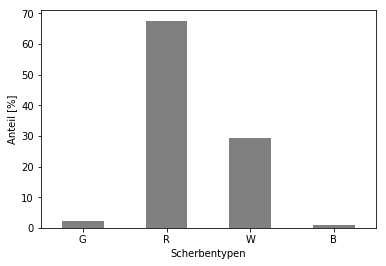

In [13]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Scherbentypen')
plt.ylabel('Anteil [%]')
plt.show()

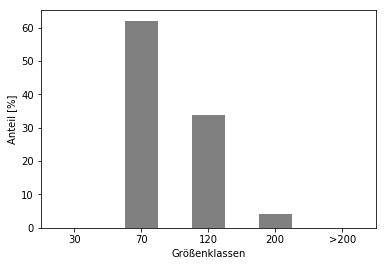

In [67]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_Ort.ort_fluss,
           t_Obj.GefEinheit AS GE,
           t_Obj.Scherbe,
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Gr_Clist,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

df_pivot = df.pivot_table(values = 'Anzahl', index = 'Gr_Clist', aggfunc = np.sum)
#df_pivot['B'] = 0.
custom_dict = {'30':0, 70:1, 120:3,200:4,'>200':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100

df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Größenklassen')
plt.ylabel('Anteil [%]')
plt.show()

In [68]:
df_pivot

,Anzahl,Prozent
30,NaN,NaN
70,108.0,62.068966
120,59.0,33.908046
200,7.0,4.022989
>200,NaN,NaN


## Technologische Merkmale (*fabrics*)

In [81]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_Obj.Anzahl,
           t_Obj.MagerungGröße,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [82]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


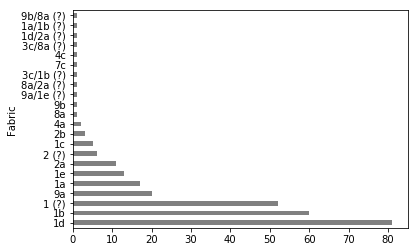

In [83]:
df_pivot.plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

In [84]:
df1 = df.dropna(subset = ['Fabric'])

a = pd.Series({'1':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("1")]),
               '2':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("2")]),
               '3':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("3")]),
               '4':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("4")]),
               '5':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("5")]),
               '6':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("6")]),
               '7':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("7")]),
               '8':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("8")]),
               '9':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("9")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
1,232,80.836237
2,22,7.665505
3,2,0.696864
4,3,1.045296
5,0,0.000000
6,0,0.000000
7,1,0.348432
8,4,1.393728
9,23,8.013937


In [92]:
a = df1.loc[df1["Fabric"].str.contains("9")]
a.pivot_table(values = 'Anzahl', index = ['Ort', 'bef_nr'], aggfunc = sum)

Ort                bef_nr
Bobusa (Fpl. 239)  87/102    14
Boleko (Fpl. 285)  87/1       1
                   87/101     5
Bonga (Fpl. 238)   87/101     1
Sosolo (Fpl. 241)  87/101     2
Name: Anzahl, dtype: int64

In [93]:
a.pivot_table(values = 'Anzahl', index = ['Typ'], aggfunc = sum)

Typ
BBS/BOT (?)     1
BOT             3
BOT (?)        19
Name: Anzahl, dtype: int64

In [18]:
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
display(df_pivot.head())

,Anzahl,Prozent
Fabric,,
1d,81,28.825623
1b,60,21.352313
1 (?),52,18.505338
9a,20,7.117438
1a,17,6.049822


In [19]:
df = df.replace('<1','sehr wenig', regex=True)

a = df.loc[df['MagerungDichte'] != ''] # nur Einträgen, bei denen diese Felder ausgefüllt sind
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)
custom_dict = {'sehr wenig':0,'wenig':1,'mittel':3,'viel':4, 'sehr viel':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
sehr wenig,134,79.289941
wenig,10,5.917160
mittel,5,2.958580
viel,10,5.917160
sehr viel,10,5.917160


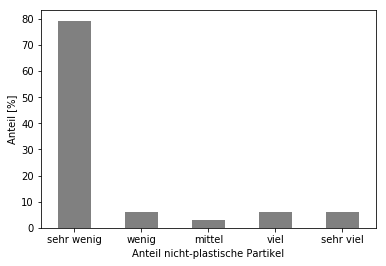

In [20]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Anteil nicht-plastische Partikel')
plt.ylabel('Anteil [%]')
plt.show()

In [21]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungGröße', aggfunc = sum)
custom_dict = {'VF':0,'F':1,'M':3,'C':4, 'VC':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
VF,121,71.597633
F,12,7.100592
M,12,7.100592
C,16,9.467456
VC,8,4.733728


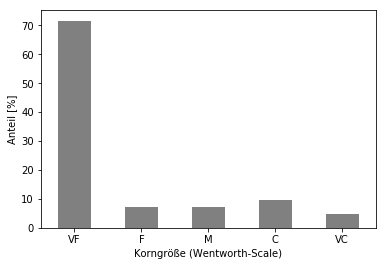

In [22]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Korngröße (Wentworth-Scale)')
plt.ylabel('Anteil [%]')
plt.show()

In [23]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Anzahl,Prozent
MagerungArt,,
S,137,81.065089
Schamott,17,10.059172
S/Schamott,6,3.550296
S/Gl,5,2.958580
S/Org,2,1.183432
Laterit,1,0.591716
S/Laterit,1,0.591716


## Brennfarbe

In [24]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,22,9.128631
Sonstig,72,29.875519
Weiß,147,60.995851


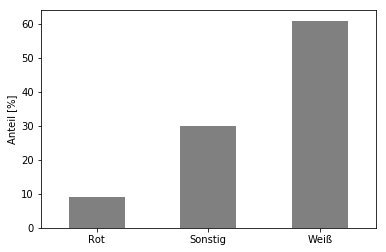

In [25]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

In [26]:
# Sontiges:
a = df[~df['Farbe'].str.contains("W|R")]
pd.Series(' '.join(a['Farbe']).lower().split('/')).value_counts()[:10]

        155
         43
s        34
bg       23
g        21
bg s      4
bg        4
 s        3
br        3
s         2
dtype: int64

### Gefäßformen

In [164]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [153]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)

df_pivot['GefForm'] = df_pivot.index
a = pd.Series({'sicher':sum(df_pivot['objID'].loc[~df_pivot['GefForm'].str.contains(" ")]),
               'fraglich':sum(df_pivot['objID'].loc[df_pivot['GefForm'].str.contains(" ")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,99,65.562914
sicher,52,34.437086


In [154]:
a[0].sum()

151

In [155]:
# alles fragliche einfach abschneiden und nur 1. Variante behalten:
df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
df['Form_Gef'] = df['Form_Gef'].apply(lambda x: x.split('/')[0])

In [162]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot

,objID
Form_Gef,
A1,1
A2,4
B1,1
B2,2
B4,1
C2,1
D2,1
E1,15
E2,1


In [158]:
len(df_pivot)

18

In [159]:
df_pivot['objID'].sum()

151

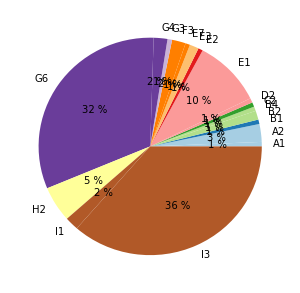

In [160]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
#plt.savefig('../output/figs/3-1-2-12_Epena_GefForm2.pdf', bbox_inches='tight')

In [170]:
df['FormGrundGef'] = df['Form_Gef'].map(lambda x: str(x)[:1])
df_pivot = df.pivot_table(values = 'objID', index = 'FormGrundGef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
FormGrundGef,,
I,58,38.410596
G,52,34.437086
E,19,12.582781
H,8,5.298013
A,5,3.311258
B,4,2.649007
F,3,1.986755
C,1,0.662252
D,1,0.662252


In [171]:
df_pivot['objID'].sum()

151

### Proportionen

In [182]:
sql = """SELECT
           [t_Ort].[ort_kurz] || ' ' || [t_Komplex].[bef_nr] || ':' || [t_Obj].[Individuum] AS Ind,
           t_Obj.muendungsD,
           t_Obj.muendungsH,
           t_Obj.minD,
           t_Obj.minD_H,
           t_Obj.maxD,
           t_Obj.maxD_H,
           t_Obj.bodenD,
           t_obj.Form_Gef
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['muendungsD'] = df['muendungsD'].convert_objects(convert_numeric=True)
df['muendungsH'] = df['muendungsH'].convert_objects(convert_numeric=True)
df['minD'] = df['minD'].convert_objects(convert_numeric=True)
df['minD_H'] = df['minD_H'].convert_objects(convert_numeric=True)
df['maxD'] = df['maxD'].convert_objects(convert_numeric=True)
df['maxD_H'] = df['maxD_H'].convert_objects(convert_numeric=True)
df['bodenD'] = df['bodenD'].convert_objects(convert_numeric=True)

# display(df.head())

# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['muendungsD-muendH'] = df['muendungsD'] / df['muendungsH']
# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['muend-min'] = df['muendungsD'] / df['minD']
# Verhältnis aus Maximaler Durchmesser / Minimaler Durchmesser
df['max-min'] = df['maxD'] / df['minD']

#a = df.loc[df['Form_Gef'].str.contains("C2")]
#b = df.loc[~df['Form_Gef'].str.contains("C2")]

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta

In [183]:
a = df.loc[df['Form_Gef'].str.contains("I")] 
b = df.loc[df['Form_Gef'].str.contains("G")] 
c = df.loc[df['Form_Gef'].str.contains("E")] 
d = df.loc[~df['Form_Gef'].str.contains("I|G|E")]

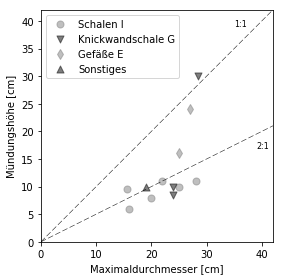

In [184]:
fig = plt.figure(1)
#fig.set_size_inches(10,10)

ax = plt.subplot(111)

plt.scatter(a['maxD'], a['muendungsH'], alpha=0.5, c = 'grey', s = 50, marker = "o", label = 'Schalen I')
plt.scatter(b['maxD'], b['muendungsH'], alpha=0.5, c = 'black', s = 50, marker = "v", label = 'Knickwandschale G')#
plt.scatter(c['maxD'], c['muendungsH'], alpha=0.5, c = 'grey', s = 50, marker = "d", label = 'Gefäße E')
plt.scatter(d['maxD'], d['muendungsH'], alpha=0.5, c = 'black', s = 50, marker = "^", label = 'Sonstiges')
plt.legend(loc = 2)
plt.xlabel("Maximaldurchmesser [cm]")
plt.ylabel("Mündungshöhe [cm]")

ax.plot([0, 10,20,50],[0, 10,20,50], color='black', linestyle = '--', linewidth=0.5)
ax.text(35, 39, '1:1', color='black', fontsize=8)

ax.plot([0, 10,20,50],[0, 5,10,25], color='black', linestyle = '--', linewidth=0.5)
ax.text(39, 17, '2:1', color='black', fontsize=8)

plt.xlim(0,42) 
plt.ylim(0,42) 

ax.set_aspect('equal')
plt.tight_layout()

#plt.savefig('../output/figs/3-1-2-2_Ngombe_Keramik-Proportionen.pdf', bbox_inches='tight')
plt.show()

In [187]:
df.describe()

,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,bodenD,muendungsD-muendH,muend-min,max-min
count,127.000000,18.000000,49.000000,13.000000,39.000000,16.000000,14.000000,18.000000,41.000000,19.000000
mean,25.464567,14.944444,22.744898,12.192308,23.500000,7.843750,2.071429,2.083418,1.049713,1.215100
std,7.115315,10.543870,12.690680,10.306831,4.673554,8.472935,5.090931,0.832092,0.249334,0.612750
min,9.000000,6.000000,4.000000,6.000000,15.500000,1.500000,0.000000,0.240000,0.110526,0.347368
25%,20.000000,10.000000,16.500000,7.500000,20.000000,3.000000,0.000000,1.833059,1.000000,1.000000
50%,26.000000,11.000000,21.000000,8.500000,24.000000,6.750000,0.000000,2.215909,1.080000,1.040816
75%,30.000000,15.875000,25.500000,11.000000,27.000000,8.000000,0.000000,2.636364,1.142857,1.071915
max,45.000000,50.000000,95.000000,45.000000,33.000000,38.000000,18.000000,3.500000,1.666667,3.375000


## Mündungs- und Randformen

In [198]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)
# display(df.head())

# Zeilen ohne Mdg löschen
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Mdg'])
df1['Form_Mdg'] = df1['Form_Mdg'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Mdg'] = df1['Form_Mdg'].apply(lambda x: x.split('/')[0])\

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot.head()

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M3,63,39.375
M5,36,22.500
M1,28,17.500
M2,25,15.625
M6,6,3.750


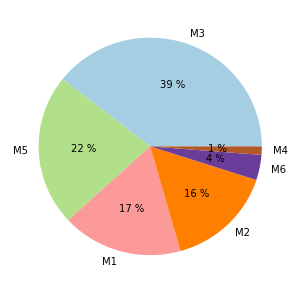

In [199]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [200]:
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Rand'])
df1['Form_Rand'] = df1['Form_Rand'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Rand'] = df1['Form_Rand'].apply(lambda x: x.split('/')[0])

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand,,
A4.3,76,44.970414
B1,20,11.834320
A1,19,11.242604
B1.3,15,8.875740
B2,9,5.325444


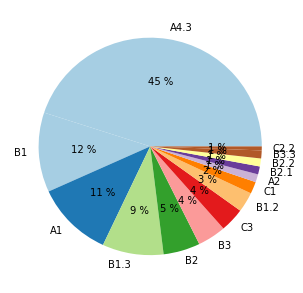

In [201]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [202]:
df_pivot = pd.DataFrame(df_pivot)

a = pd.Series({'A':sum(df_pivot['objID'].loc[df_pivot.index.str.contains("A")]),
               'B':sum(df_pivot['objID'].loc[df_pivot.index.str.contains("B")]),
               'C':sum(df_pivot['objID'].loc[df_pivot.index.str.contains("C")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
A,97,57.396450
B,62,36.686391
C,10,5.917160


In [204]:
a[0].sum()

169

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


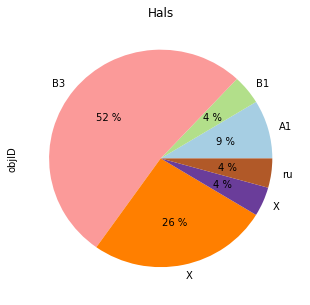

In [192]:
a = df.dropna(subset = ['Form_Hals'])
a['Form_Hals'] = a['Form_Hals'].map(lambda x: str(x)[:2])

df_pivot = a.pivot_table(values = 'objID', index = 'Form_Hals', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Hals")

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


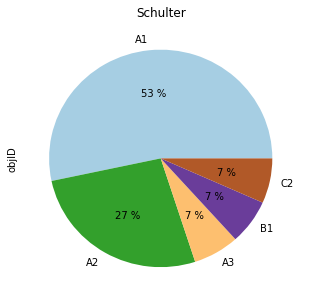

In [43]:
b = df.dropna(subset = ['Form_Schulter'])
b['Form_Schulter'] = b['Form_Schulter'].map(lambda x: str(x)[:2])

df_pivot = b.pivot_table(values = 'objID', index = 'Form_Schulter', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Schulter")

## Boden

In [209]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Boden,
           t_Obj.Anzahl
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)


df_pivot = df.pivot_table(values = 'objID', index = 'Form_Boden', columns='Typ', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
#df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
#df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

Typ,BOT (?),BOT/MKA (?),BOT/MKA/MAT (?)
Form_Boden,,,
B1,5.0,2.0,2.0
B11,1.0,NaN,NaN
B12,1.0,NaN,NaN
B13,1.0,NaN,NaN


In [45]:
len(df['Form_Boden'])

12

## Verzierungen

In [2]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


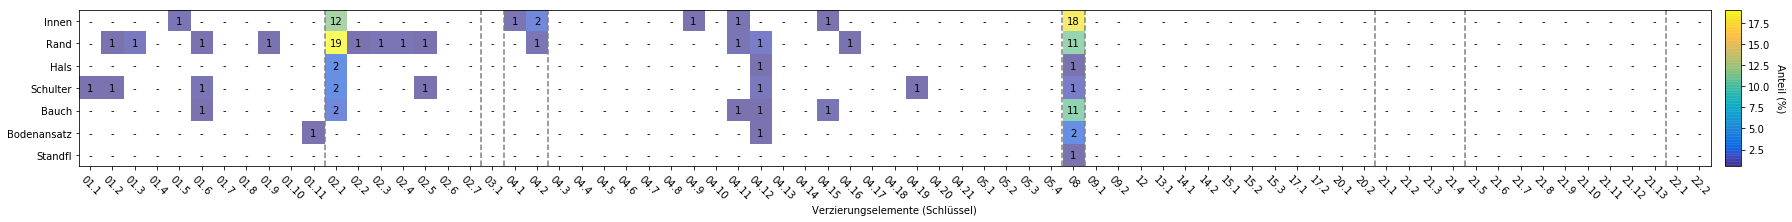

In [3]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-2-1-5_Botendo_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [212]:
sql = """SELECT
            t_Obj.objID,
            t_Obj.Anzahl,
            t_K_Verz.verzName,
            [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
            [t_Obj].[Verz_PosUnbekannt] || '/' || [t_Obj].[Verz_Innen_Rand/Hals/berteil] || '/' || [t_Obj].[Ver_Rand] || '/' || [t_Obj].[Verz_Oberteil] || '/' || [t_Obj].[Verz_Hals] || '/' || [t_Obj].[Verz_Schulter] || '/' || [t_Obj].[Verz_Bauch] || '/' || [t_Obj].[Verz_Unterteil] || '/' || [t_Obj].[Verz_Bodenansatz] || '/' || [t_Obj].[Ver_Standfl] AS ObjVerz
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Ort.ortID = t_Komplex.ortID
            LEFT JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
            LEFT JOIN t_K_Pos ON t_K_Pos.posID = "t_ObjPosVerz".posID
            LEFT JOIN t_K_Verz ON t_K_Verz.verzID = "t_ObjPosVerz".verzID
        WHERE (((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['pos'].fillna('unverz', inplace=True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'objID', columns = 'pos', aggfunc = len)

a = pd.Series({'unverziert':len(df_pivot.loc[df_pivot['unverz'] == 1]),
               'verziert':len(df_pivot.loc[df_pivot['unverz'] != 1])})
a = pd.DataFrame(a)
a = a.rename(columns={0:'Anzahl'})
a['Prozent'] = a['Anzahl']/a['Anzahl'].sum()*100
a

,Anzahl,Prozent
unverziert,55,23.305085
verziert,181,76.694915


In [215]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'objID', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)

df_pivot.describe()

,Anzahl
count,236.000000
mean,1.639831
std,1.019774
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,6.000000


In [218]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
#display(df.head())

df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


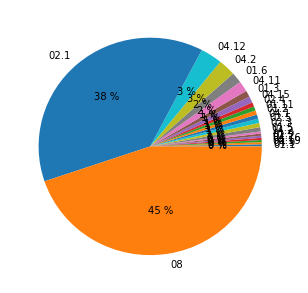

In [219]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%')
plt.ylabel('')

In [223]:
a = pd.Series({'Eindrücke (einzeln)':len(df.loc[df['verzName'].str.contains("04.")].index),
               'Sonstiges':len(df.loc[~df['verzName'].str.contains("04.")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Eindrücke (einzeln),31,9.77918
Sonstiges,286,90.22082


In [51]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

,objID,Prozent
pos,,
1 Innen,104,32.807571
2 Rand,114,35.962145
3 Hals,11,3.470032
4 Schulter,24,7.570978
5 Bauch,53,16.719243
6 Bodenansatz,9,2.839117
7 Standfl,2,0.630915


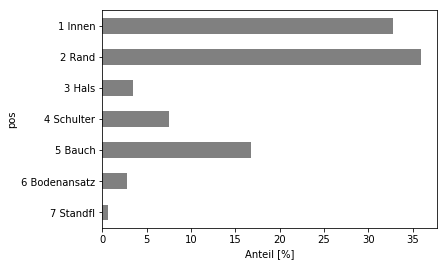

In [52]:
df_pivot = df_pivot.sort_index(ascending=False)

df_pivot.plot(y = 'Prozent', kind = 'barh', legend = None, color = 'grey')
plt.xlabel('Anteil [%]')
plt.show()

## Verbreitung

In [53]:
df = style_mapping_gis_export(style)
df.sort_values(['Kat-Nr'])

Typ,Ort,Kat-Nr,X,Y,TYP
0,Bobangi (Fpl. 189),189,17.722248,-0.108898,BOT
2,Bokwango (Fpl. 190),190,17.780500,0.102769,BOT
23,Zamba (Fpl. 191),191,17.884584,0.271798,BOT (?)
10,Ilanga (Fpl. 192),192,17.897891,0.284087,BOT
12,Loka (Fpl. 193),193,17.945614,0.320338,BOT
4,Bolumbu (Fpl. 194),194,17.882294,0.677829,BOT
8,Boyoka (Fpl. 196),196,17.898659,1.089931,BOT
1,Bobulu (Fpl. 198),198,18.042886,1.441145,BOT (?)
15,Lukolela (Fpl. 234),234,17.175593,-1.062185,BOT (?)
16,Sungu (Fpl. 236),236,17.334786,-1.033313,BOT


In [54]:
df.to_csv("../data/processed/3-2-1-5_BOT_Verbreitung.csv", index = False)

In [55]:
len(df)

24

## Tafeln

In [56]:
# damit alle Zeilen angezeigt werden:
pd.set_option('display.max_rows', None)

In [57]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Typ,Form_Gef,Form_Rand,Form_Boden
0,1,4,BOB,85/101,NaN,b,BOT (?),I3,B1/B3,B12
1,2,2,BKW,85/101,NaN,8,BOT,A1 (?),B2,None
2,3,9,ZAM,85/101,NaN,2,BOT (?),C2/G6 (?),B1,None
3,3,14,LKA,85/101,NaN,20,BOT,I3 (?),A4.3,None
4,4,4,BLU,85/101,NaN,8,BOT,G6,A4.3,None
5,4,5,BLU,85/101,NaN,10,BOT,G6 (?),A4.3,None
6,5,5,BYO,85/101,NaN,58,BKW/BOT (?),None,None,None
7,32,15,SUN,87/101,NaN,65,BOT,G6,A4.3,None
8,33,3,GMB,87/101,NaN,11,BOT (?),G6,A1/B1,None
9,34,5,BBS,87/102,NaN,130,BOT (?),I3,B1.3,B1


In [58]:
len(df)

229